# Gradijentni spust

## Gradijentni spust: Uvod i ideja

Gradijentni spust *(engl. Gradient descent)* je generenički optimizacijski algoritam koji je ustanju pronaći optimalna rješenja za različiti broj problema. Temeljna ideja gradijentnog spusta jest iterativnim postupkom mijenjati parametre s ciljem minimiziranja (ili maksimiziranja) funkcije cijene.

Pojednostavljena ideja iza gradijentnog spusta leži u činjenici da funkciju cijene možemo skicirati kao "brda i doline" gdje tražimo najnižu moguću točku u koju možemo doći iz trenutne pozicije. Primjer funkcije cijene srednje kvadratne pogreške za linearnu regresiju može se vidjeti na sljedećoj slici:

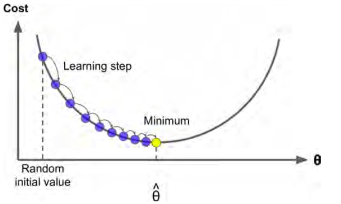


Na samom početku nasumično se odrede vrijednosti parametra $\Theta$ *(engl. random initialisation)* po kojem je funkcija cijene parametrizirana. U svakoj od sljedećih iteracija mijenjamo parametar $\Theta$ na takav način da se pomičemo niz gradijent (prva derivacija funkcije cijene). Drugim riječima, izračun gradijenta daje nam smjer u kojem se nalazi "bolje" rješenje od onog trenutnog. Kako bi se odredila veličina "koraka" u smijeru ka boljem rješenju, uvodi se hiperparametar stope učenja $\alpha$ *(engl. learning rate)*. 

Određivanje stope učenja $\alpha$ u izvornom algoritmu gradijentnog spusta provodi se empirijski (tako da postoji iskustvo na sličnom problemu), ili eksperimentalno koristeći metodu poput [grid-search algoritma](https://en.wikipedia.org/wiki/Hyperparameter_optimization). 

Uzrok premale stope učenja rezultira da je konvergencija ka rješenju veoma spora, a ako je model limitiran brojem koraka, postoji mogućnost da model ne uspije naučiti optimalne vrijednost parametra theta. Jedan primjer premale stope učenja može se vidjeti na slici:

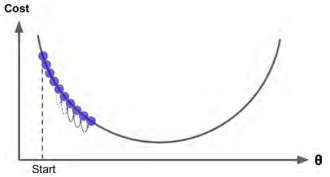

Opozitno prethodnom problemu jest prevelika stopa učenja koji uzrokuje divergenciju, odnosno model "preskoči" optimalne parametre. Primjer ovakve stope učenja nalazi se na slici:

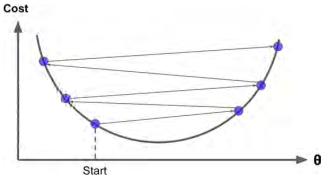




## Pseudokod gradijentnog spusta

Originialni pseudokod za gradijentni spust jest sljedeći:

<div class="alert alert-block alert-info">
$\alpha = r; (r \in \mathbb{R})$

$\text{while(convergence)} \{ $

$\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \}$

</div>

gdje $\alpha$ označva stopu učenja (tipično realni broj u intervalu $0 \leq \alpha \leq 1$, uvijet $\text{"convergence"}$ može biti broj epoha (iteracija) ili preciznost modela bilo na trening setu gdje počne stagnirati, ili na cross-validacijskom setu gdje se počne povećavati i $J(\Theta)$ je funkcija cijene koja se optimizira. 


## Primjer gradijentnog spusta

Sljedeći kod implementirati će jednostavnu neurnosku mrežu na setu podataka **california houses prices** koji se sastoji od $8$ značajki:

1. medianIncome *("MedInc")* - Prosječna zarada domaćinstava koja se nalaze u okolici (mjereno u 10k \$),

2. housingMedianAge *("HouseAge)* - Prosječna starost kuća koje se nalaze u okolici (niži broj novija zgrada),

3. averageRooms *("AveRooms")* - Prosječan broj soba u kućama koje se nalaze u okolici,

4. averageBedrooms *("AveBedrms")* - Prosječan broj spavaćih soba u kućama koje se nalaze u okolici,

5. population *("Population")* - Prosječan broj ljudi koji žive u okolici,

6. households *("AveOccup")* - Prosječan broj ljudi po domaćinstvu,

7. latitude *("Latitude")* - Mjera koja kaže koliko je sjeverno kuća,

8. longitude *("Longitude")* - Mjera koja kaže kolo je zapadno kuća.

Dakle temeljem ovih 8 značajki i cijene koliko pojedina kuća vrijedi, potrebno je kreirati takav model koji će predvidjeti cijenu neke nove kuće ako su za nju poznate prethodno navedene značajke.

Više o podacima može se pronaći na poveznicama: [docs](https://www.kaggle.com/camnugent/california-housing-prices), [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch


# Get data
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Scale data
s = StandardScaler()
X_full = s.fit_transform(X_full)
y_full = s.fit_transform(y_full.reshape(-1,1))
y_full = y_full.ravel()

# Create datasets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.10, random_state = 50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.10, random_state = 50)

#print(X_train.shape, y_train.shape)
#print(X_valid.shape, y_valid.shape)
#print(X_test.shape, y_test.shape)



# Build graph of neural network
# Define number of neurons
n_inputs = 8
n_hidden1 = 100
n_hidden2 = 100
n_hidden3 = 100
n_hidden4 = 50
n_outputs = 1

# Build graph
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape =(None, n_inputs), name = 'X')
y = tf.placeholder(tf.float32, shape =(None), name = 'y')

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name = "hidden3", activation = tf.nn.relu)
    hidden4 = tf.layers.dense(hidden3, n_hidden4, name = "hidden4", activation = tf.nn.relu)
    logits = tf.layers.dense(hidden4, n_outputs, name = "outputs")
    
with tf.name_scope("loss"):
    loss = tf.losses.mean_squared_error(y, logits)
    

learning_rate = 0.0001

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    accuracy = tf.losses.mean_squared_error(y, logits)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_train, y: y_train})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
    
    print(accuracy.eval(feed_dict = {X: X_test, y: y_test}))
    
    save_path = saver.save(sess, "./my_model_final.ckpt")
    

0 Batch accuracy: 1.0175471 Validation accuracy: 1.02248
5 Batch accuracy: 1.0039647 Validation accuracy: 0.9996234
10 Batch accuracy: 1.00343 Validation accuracy: 0.9976073
15 Batch accuracy: 1.0032523 Validation accuracy: 0.9969481
20 Batch accuracy: 1.0031288 Validation accuracy: 0.99654096
25 Batch accuracy: 1.0030125 Validation accuracy: 0.9961925
30 Batch accuracy: 1.0028993 Validation accuracy: 0.9959472
35 Batch accuracy: 1.0027869 Validation accuracy: 0.9957231
40 Batch accuracy: 1.0026896 Validation accuracy: 0.9955068
45 Batch accuracy: 1.0026313 Validation accuracy: 0.9953568
50 Batch accuracy: 1.0025742 Validation accuracy: 0.99526733
55 Batch accuracy: 1.0025369 Validation accuracy: 0.99514115
60 Batch accuracy: 1.0024754 Validation accuracy: 0.9950605
65 Batch accuracy: 1.0024141 Validation accuracy: 0.9949667
70 Batch accuracy: 1.0023605 Validation accuracy: 0.9948906
75 Batch accuracy: 1.0023385 Validation accuracy: 0.9948004
80 Batch accuracy: 1.0023196 Validation acc

675 Batch accuracy: 1.0017756 Validation accuracy: 0.99396914
680 Batch accuracy: 1.0017874 Validation accuracy: 0.99395174
685 Batch accuracy: 1.0017744 Validation accuracy: 0.99396306
690 Batch accuracy: 1.001768 Validation accuracy: 0.9939633
695 Batch accuracy: 1.0017804 Validation accuracy: 0.9939641
700 Batch accuracy: 1.0017782 Validation accuracy: 0.9939727
705 Batch accuracy: 1.0017844 Validation accuracy: 0.9939628
710 Batch accuracy: 1.0017835 Validation accuracy: 0.99394244
715 Batch accuracy: 1.0017719 Validation accuracy: 0.9939408
720 Batch accuracy: 1.0017701 Validation accuracy: 0.99392843
725 Batch accuracy: 1.0017688 Validation accuracy: 0.9939233
730 Batch accuracy: 1.0017709 Validation accuracy: 0.99392366
735 Batch accuracy: 1.0017693 Validation accuracy: 0.9939089
740 Batch accuracy: 1.0017698 Validation accuracy: 0.99391216
745 Batch accuracy: 1.0017684 Validation accuracy: 0.9939115
750 Batch accuracy: 1.0017732 Validation accuracy: 0.99391043
755 Batch accurac